In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [340]:
s = pd.Series([1,2,3,4,5, np.nan, 6, 7])

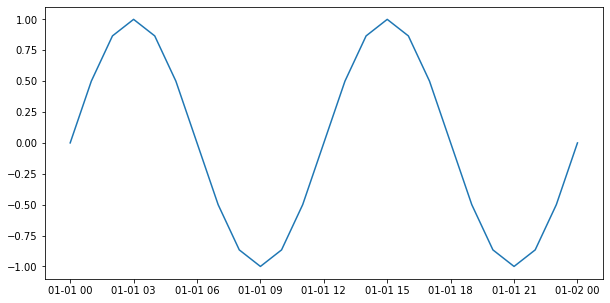

In [339]:
# creating a date range with some frequency
plt.figure(figsize=(10, 5))
dates = pd.date_range("20130101", end="20130102", freq="1H")
df3 = pd.Series(np.sin(np.linspace(-2 * np.pi, 2 * np.pi, 25)), index=dates)
lp = sns.lineplot(data=df3)

In [341]:
df = pd.DataFrame(np.random.randn(25, 4), index=dates, columns=['HP', 'Attack', 'Speed', 'Defense'])
df.index.name = 'Date'

<AxesSubplot:xlabel='Date', ylabel='HP'>

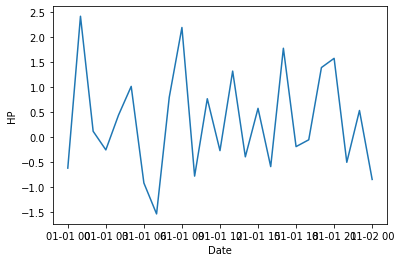

In [342]:
sns.lineplot(data=df, y="HP", x="Date")

In [343]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [344]:
df2.dtypes # check the types of a dataframe
df2.to_numpy() # turn to numpy representation (might be expensive)

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.
Might be expensive
Does not contain the index column

In [345]:
df.info()
df.describe() # short statistical summary

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2013-01-01 00:00:00 to 2013-01-02 00:00:00
Freq: H
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HP       25 non-null     float64
 1   Attack   25 non-null     float64
 2   Speed    25 non-null     float64
 3   Defense  25 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


,HP,Attack,Speed,Defense
count,25.000000,25.000000,25.000000,25.000000
mean,0.323271,-0.273318,-0.352723,0.027265
std,1.047368,0.932722,0.988448,1.021763
min,-1.530291,-2.435795,-2.625768,-1.881394
25%,-0.498432,-0.911608,-0.831200,-0.568745
50%,0.121573,-0.214000,-0.203369,0.060142
75%,1.019000,0.111474,0.419637,0.656403
max,2.421127,1.811269,1.553186,2.222317


In [346]:
df.T # transposes the data
df.sort_index(axis=1, ascending=False) # sorts by column names or index
df.sort_values(by="Speed", ascending=False).head(3) # sort by fastest

,HP,Attack,Speed,Defense
Date,,,,
2013-01-01 01:00:00,2.421127,-0.811336,1.553186,-1.685824
2013-01-01 07:00:00,-1.530291,-0.911608,0.976860,1.562548
2013-01-01 18:00:00,-0.184836,1.232721,0.577819,-0.297387


While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

### Selection of data

In [347]:
df.HP
df[0:3] # get from first to third row
df['20130101 01':'20130101 07'] # iterate through hours
df.loc[dates[0]] # selection by a particular date
df.loc[:, ['HP', 'Speed']] # selection by columns
df.loc['20130101 01':'20130101 07', ['HP', 'Attack']] # both techniques
df.loc['20130101 08', ['HP', 'Speed']] # dimension reduction
df.loc[dates[0], 'HP'] # getting singular value
# For getting fast access to a scalar (equivalent to the prior method):
df.at['20130101 08', 'HP'] # like iat by taking strings
df.iloc[5] # selection by position
df.iloc[3:5, 0:2] # third to fifth row, 0 to 2 columns
df.iloc[[1, 3, 5], [0,3]] # access rows and columns by their indices
df.iloc[1:3, :] # all columns
df.iloc[1, 1] # explicit value taking
df.iat[1, 1] # scalar extraction faster than the previous method (index at)
df2['E'] = ['one', 'one', 'two', 'three']
df2[df2['E'].isin(['one', 'two'])] # filter those whose column is in a list of values

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,one,foo
1,1.0,2013-01-02,1.0,3,one,foo
2,1.0,2013-01-02,1.0,3,two,foo


### Setting data

In [163]:
s1 = pd.Series(data=range(25), index=dates)

In [349]:
# Adding new columns
df['K'] = s1
df['F'] = s1 + np.random.randn(25)
# df[df.Attack > df.Attack.mean()]['F'] = 'Strong'
df3 = df.copy()
strong_mask = df3['Attack'] > df3['HP'].mean() # filter to by given to a query
df3['H'] = np.repeat('Weak', 25)
df3.loc[strong_mask, 'H'] = 'Strong' # change those where the mask holds

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [350]:
# missing data
df4 = df3.reindex(dates[0:12], columns=list(df3.columns) + ['Type 1'])
df4.loc[df4['Attack'] > df4['Attack'].mean(), 'Type 1'] = 'Fire'

In [351]:
df4
mask_of_empty_type = pd.isna(df4['Type 1'])

In [323]:
# drop any having nan
df4.fillna(value='Water')
df4['Type 1'] = df4['Type 1'].fillna(value='Water') # replace the Type 1 where there's NA with 'Water'

In [324]:
# Operations
df4.mean(1).head(2) # means on rows

2013-01-01 00:00:00    0.692570
2013-01-01 01:00:00   -0.024105
Freq: H, dtype: float64

In [325]:
dates = pd.date_range('20130101', periods=6)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) # shifts ahead -> forward and it inserts NaN at front
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df.sub(s, axis='index').head(2) # df - s

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN


In [264]:
# Apply
df['A'].to_numpy().cumsum()
df.apply(np.cumsum, axis=0) # cumsum cols
df.apply(np.cumsum, axis=1) # cumsum rows
df.apply(lambda x: x.max() - x.min() # apply lambda on each column, if axis=1 it's going to be each row

A    2.062016
B    3.106088
C    1.742332
D    4.356458
dtype: float64

In [266]:
# Strings
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower() # turns the strings to lower case, check other methods

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [329]:
pd.concat([df[1:5], df.apply(np.cumsum)[1:5]]) # contacts the rows of a list of dataframes

,A,B,C,D
2013-01-02,0.220052,-0.147655,1.844760,-0.062559
2013-01-03,-0.424417,0.836873,-0.705534,0.387307
2013-01-04,0.170434,1.015951,-0.621562,-0.075267
2013-01-05,1.305158,-1.041134,0.849960,-0.075751
2013-01-02,0.856037,0.325650,2.563050,-1.338156
2013-01-03,0.431620,1.162524,1.857517,-0.950849
2013-01-04,0.602054,2.178475,1.235955,-1.026116
2013-01-05,1.907212,1.137341,2.085916,-1.101867


In [279]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key') # makes a mapping for each key

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [303]:
# Grouping 
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})

df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.162000 -0.788863
    three  1.134247 -0.512679
    two   -1.740696 -0.372700
foo one   -2.019630 -0.188446
    three  0.712886  1.962057
    two    0.723181  2.702686

In [309]:
# reshaping
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', # TODO: understand what that is doing
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))


In [ ]:
# LEFT:
# 1. Reshaping
# 2. Pivot Tables
# 3. Time Series
# 4. Categoricals